# Machine Learning
## 9️⃣ Unsupervised Learning

### What is Unsupervised Learning?

**Unsupervised learning** is a type of machine learning in which the algorithm is **not provided with any pre-assigned labels or scores** for the training data. As a result, unsupervised learning algorithms must first **self-discover any naturally occurring patterns in that training data set**.

### Clustering

<img src = "./clustering.png" width = 300px>

**Clustering** means grouping data having similar features without any information about each data's group infomration. Clustering's purpose is to **minimalize similarity between different clusters**, and to **maximize similarity in a cluster**.

- **Hard Clustering** expresses each data by wheter each object belongs to a cluster or not. (i.e. K-means clustering)   
- For objects created by **Soft Clustering**, each object belongs to each cluster to a certain degree. (i.e. Gaussian Mixture Model Algorithm)

### K-means Clustering

**K-means Clustering** clusters input data into K clusters. K, which is the number of clusters is **hyper parameter**.

1. Pick random K data to set as each cluster's center.
2. Calculate the distance between each data and central data, then assign the data to the nearest cluster.
3. Calculate center of each cluster's data, and set the center as the new center of the cluster.
4. Repeate 2~3 until there is no change of center's position.

#### Elbow Method

To get best **hyper parameter, K**, use **Elbow Method**.
 
<img src = "./elbow_method.png" width="300">

**Elbow method** attempts various K values and selects the part where **the cost function graph is bent**, that is, the point where increasing the number of clusters does not work much.

target  cluster
0       2          50
1       0           2
        1          48
2       0          36
        1          14
Name: sepal length (cm), dtype: int64


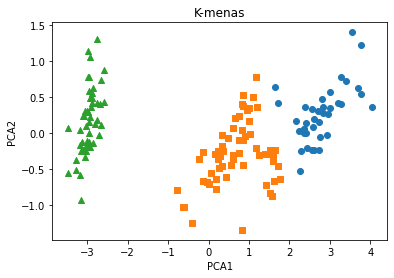

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
def load_data():
    
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target

    return irisDF
    
"""
1. Step01. Create KMeans object.

   Step02. Train the model using a data without 'target'
           
   Step03. Add the result of clustering, which is the label of center points of clusters that each data belongs to, to iris DataFrame.
"""
def k_means_clus(irisDF):
    
    kmeans = KMeans(init = 'random', n_clusters = 3, random_state = 100)
    
    kmeans.fit(irisDF.drop(columns=['target']))
    
    irisDF['cluster'] = kmeans.labels_
    
    # Use groupby function to check the result of clustering
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    return iris_result, irisDF

# Visualize the result of clustering using PCA. (PCA will be covered later in this file.)
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # Extract indexes of values of the cluster with values of 0, 1, and 2, respectively.
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('K-menas')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    ax.plot()


def main():
    
    irisDF = load_data()
    
    iris_result, irisDF = k_means_clus(irisDF)
    
    Visualize(irisDF)
    
if __name__ == "__main__":
    main()


#### Characteristics of K-means Clustering

- Since it sets the initial value randomly, the desired result may not come out if the distribution of data is unique.
- Due to its light time complexity, it is suitable for large-capacity data that require a large amount of computation.
- In practice, people operates clustering several times, and select cluster which most frequently appeared.

### Dimensionality Reduction

**Dimensionality Reduction** is an algorithm that converts high-dimensional data into low-dimensional data to prevent curse of dimensionality, and to increase model's training speed.

### PCA(Principle Component Analysis)

PCA is a method of finding a principle component that can best explain high-dimensional data. 

- original shape:    (178, 2)
- transformed shape: (178, 1)


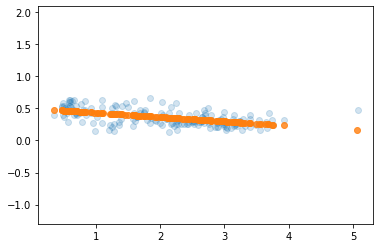

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

"""
1. Load data, and save only two designated successive columns.
          
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    column_start = 6
    
    X = X[:, column_start:column_start+2]
    
    return X
"""
2. Step01. Create PCA model, setting n_components to 1.
           
   Step02. Train the model.
   
   Step03. Get X_pca using transform().
"""
def pca_data(X):
    
    pca = PCA(n_components = 1)
    
    pca.fit(X)
    
    X_pca = pca.transform(X)
    
    return pca, X_pca

# Visualize the result of PCA.
def visualize(pca, X, X_pca):
    X_new = pca.inverse_transform(X_pca)
    
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');
    
    plt.show()

def main():
    
    X = load_data()
    
    pca, X_pca = pca_data(X)
    
    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_pca.shape)
    
    visualize(pca, X, X_pca)
    
if __name__ == '__main__':
    main()

#### Characteristics of PCA
- Since PCA implicitly expresses high-dimensional data, intuitive interpretation can be difficult.
- Usefully used when compressing large-capacity, high-dimensional data